# **EDA**

*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

In [14]:
# import lib and data

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("tiktok_dataset.csv")

In [16]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [17]:
data = data.drop(columns=['#'], axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_id                  19382 non-null  int64  
 2   video_duration_sec        19382 non-null  int64  
 3   video_transcription_text  19084 non-null  object 
 4   verified_status           19382 non-null  object 
 5   author_ban_status         19382 non-null  object 
 6   video_view_count          19084 non-null  float64
 7   video_like_count          19084 non-null  float64
 8   video_share_count         19084 non-null  float64
 9   video_download_count      19084 non-null  float64
 10  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.6+ MB


In [19]:
data.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [20]:
data.shape

(19382, 11)

In [21]:
data.isna().sum()

claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

**Understand Variables**

In [22]:
data['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

In [30]:
print("Mean: ", data[data['claim_status'] == 'claim'].video_view_count.mean())
print("Medium: ", data[data['claim_status'] == 'claim'].video_view_count.median())

Mean:  501029.4527477102
Medium:  501555.0


In [31]:
print("Mean: ", data[data['claim_status'] == 'opinion'].video_view_count.mean())
print("Medium: ", data[data['claim_status'] == 'opinion'].video_view_count.median())

Mean:  4956.43224989447
Medium:  4953.0


*NOTE* The dependent variable is evenly distributed

In [36]:
#author status
data.groupby(['claim_status', 'author_ban_status']).count()['video_id']

claim_status  author_ban_status
claim         active               6566
              banned               1439
              under review         1603
opinion       active               8817
              banned                196
              under review          463
Name: video_id, dtype: int64

*NOTE:*
Including the possibilities that:
* Claim videos are more strictly policed than opinion videos
* Authors must comply with a stricter set of rules if they post a claim than if they post an opinion

In [37]:
data.groupby('author_ban_status').agg({'video_view_count':['mean','median'], 
                                       'video_like_count': ['mean','median'],
                                       'video_share_count': ['mean','median']})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [39]:
data.groupby(['author_ban_status']).median(numeric_only=True)[['video_share_count']]

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


In [40]:
data.groupby('author_ban_status').agg({'video_view_count':['mean','median','count'], 
                                       'video_like_count': ['mean','median','count'],
                                       'video_share_count': ['mean','median','count']})

video_view_count                  video_like_count  \
                              mean    median  count             mean   
author_ban_status                                                      
active               215927.039524    8616.0  15383     71036.533836   
banned               445845.439144  448201.0   1635    153017.236697   
under review         392204.836399  365245.5   2066    128718.050339   

                                   video_share_count                  
                     median  count              mean   median  count  
author_ban_status                                                     
active               2222.0  15383      14111.466164    437.0  15383  
banned             105573.0   1635      29998.942508  14468.0   1635  
under review        71204.5   2066      25774.696999   9444.0   2066

**create three new columns to help better understand engagement rates:**

* `likes_per_view`: represents the number of likes divided by the number of views for each video
* `comments_per_view`: represents the number of comments divided by the number of views for each video
* `shares_per_view`: represents the number of shares divided by the number of views for each video


In [41]:
data['likes_per_view'] = data['video_like_count']/ data['video_view_count']
data['comments_per_view'] = data['video_comment_count']/ data['video_view_count']
data['shares_per_view'] = data['video_share_count']/ data['video_view_count']

In [42]:
data.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [49]:
data.groupby(['claim_status', 'author_ban_status']).agg({'likes_per_view':['mean','median'],
                                                        'comments_per_view':['mean','median',],
                                                        'shares_per_view':['mean','median']})

likes_per_view           comments_per_view  \
                                         mean    median              mean   
claim_status author_ban_status                                              
claim        active                  0.329542  0.326538          0.001393   
             banned                  0.345071  0.358909          0.001377   
             under review            0.327997  0.320867          0.001367   
opinion      active                  0.219744  0.218330          0.000517   
             banned                  0.206868  0.198483          0.000434   
             under review            0.226394  0.228051          0.000536   

                                         shares_per_view            
                                  median            mean    median  
claim_status author_ban_status                                      
claim        active             0.000776        0.065456  0.049279  
             banned             0.000746        0.067893  0.051606  
             under review       0.000789        0.065733  0.049967  
opinion      active             0.000252        0.043729  0.032405  
             banned             0.000193        0.040531  0.030728  
             under review       0.000293        0.044472  0.035027

# **Build Visualization**

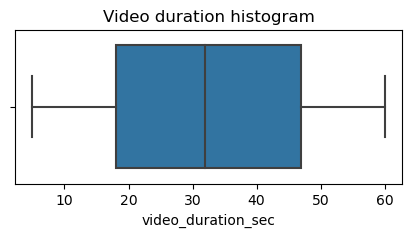

In [78]:
#video_duration_sec

plt.figure(figsize=(5,2))
sns.boxplot(x=data['video_duration_sec'])
plt.title('Video duration histogram');


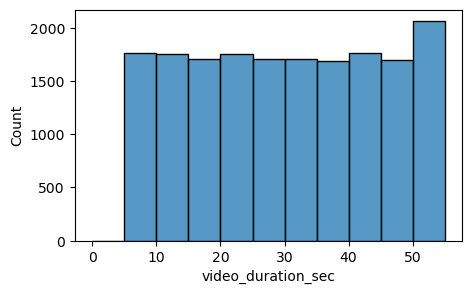

In [85]:
#video_duration_sec
plt.figure(figsize=(5,3))
fig1 =sns.histplot(x=data['video_duration_sec'], bins=range(0,60,5))

plt.show()

**video_duration_sec** is distributed uniformly

<Axes: xlabel='video_view_count', ylabel='Count'>

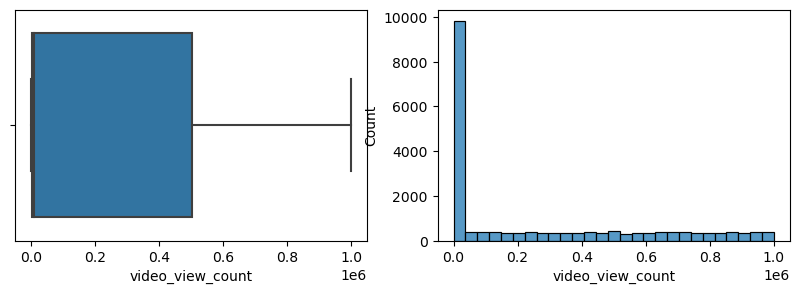

In [87]:
#video_view_count

fig, axn = plt.subplots(1,2, figsize=[10,3])

sns.boxplot(x=data['video_view_count'], ax= axn[0])
sns.histplot(x=data['video_view_count'], ax= axn[1])

**video_view_count**  has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

<Axes: xlabel='video_like_count', ylabel='Count'>

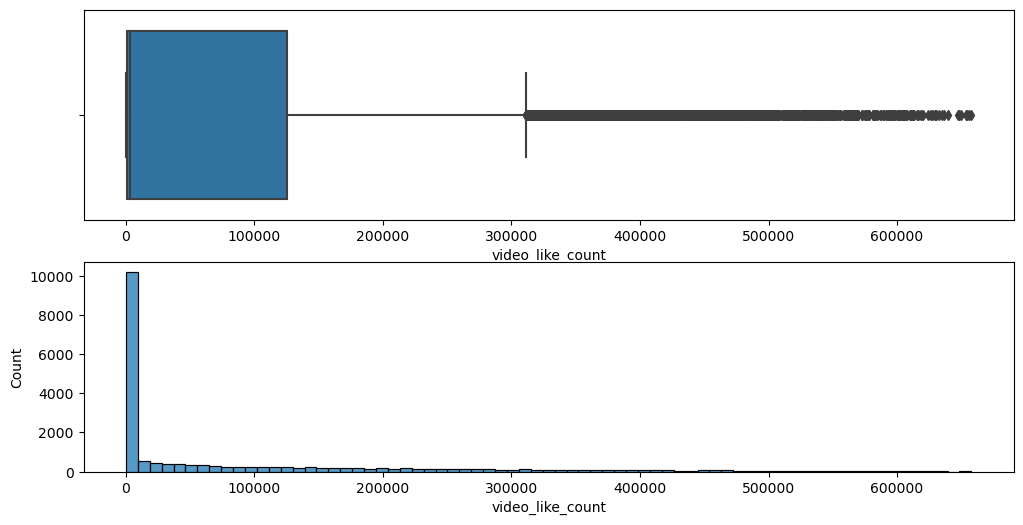

In [92]:
#video_like_count

fig, axn = plt.subplots(2,1, figsize=[12,6])

sns.boxplot(x=data['video_like_count'], ax= axn[0])
sns.histplot(x=data['video_like_count'], ax= axn[1])

Similar to **view count**, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

**Claim Status Based on verification:-**

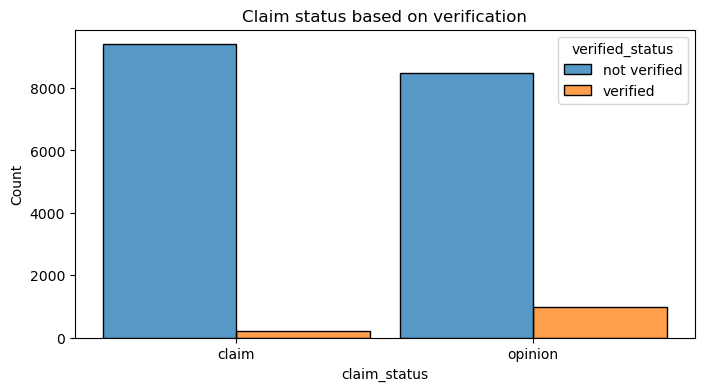

In [104]:
plt.figure(figsize=[8,4])

sns.histplot(data= data, 
            x='claim_status',
            hue='verified_status',
            multiple='dodge',
            shrink=0.9)
plt.title("Claim status based on verification")
plt.show()

<Axes: xlabel='claim_status', ylabel='Count'>

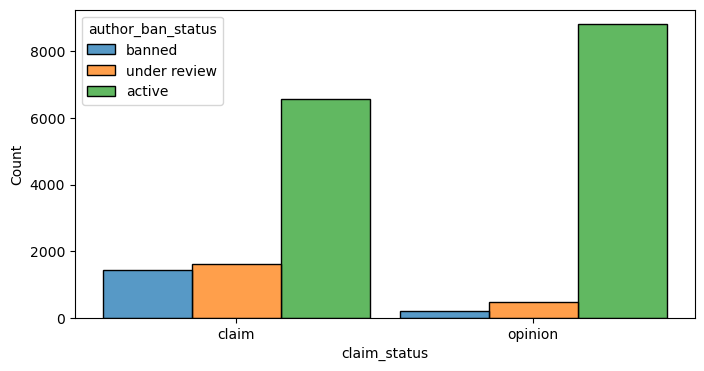

In [106]:
plt.figure(figsize=[8,4])
sns.histplot(data=data,
            x='claim_status',
             hue='author_ban_status',
             hue_order=['banned','under review','active'],
             shrink=0.9,
            multiple='dodge')

<Axes: xlabel='author_ban_status', ylabel='video_view_count'>

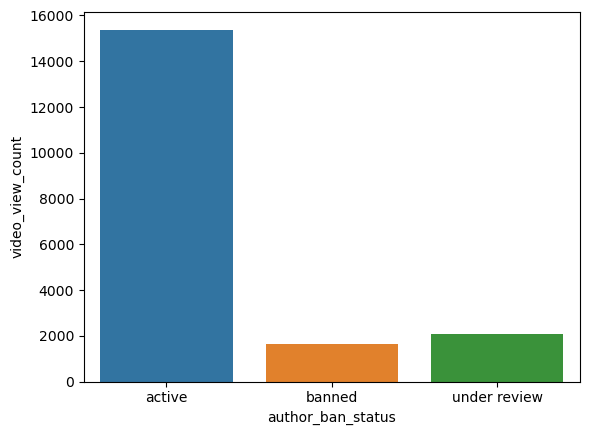

In [123]:
#banend status impact on view count
ban_status=data.groupby('author_ban_status')[['video_view_count']].count().reset_index()
sns.barplot(data=ban_status,
            x='author_ban_status',
            y='video_view_count')

**Check for Outliers**

In [130]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


# Hypothesis testing

There are a few possible ways to frame the research question. For example:

1) Do videos from verified accounts and videos unverified accounts have different average view counts?

2) Is there a relationship between the account being verified and the associated videos' like counts?

In [132]:
from scipy import stats

In [138]:
# drop NAN
data = data.dropna(axis =0)
data.isna().sum()

claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
likes_per_view              0
comments_per_view           0
shares_per_view             0
dtype: int64

**State hypothesis statement**

**Null hypothesis**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).
<br>**Alternative hypothesis**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

In [142]:
significance_level = 0.05

data_a = data[data['verified_status'] =='not verified']['video_view_count']
data_b = data[data['verified_status'] == 'verified']['video_view_count']#

stats.ttest_ind(a= data_a, b= data_b, equal_var = False)

Ttest_indResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120)

**Conclusion**

p_value << significance level

we can reject null hypothesis

There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts 

**State hypothesis statement**

**Null hypothesis**: There is no difference in number of likes between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).
<br>**Alternative hypothesis**: There is a difference in number of like between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

In [143]:
significance_level = 0.05

data_a = data[data['verified_status'] =='not verified']['video_like_count']
data_b = data[data['verified_status'] == 'verified']['video_like_count']

stats.ttest_ind(a= data_a, b= data_b, equal_var = False)

Ttest_indResult(statistic=21.315562151092116, pvalue=4.6511316028672245e-89)

**Conclusion**

p_value << significance level

we can reject null hypothesis

There is a difference in number of likes between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts 

# Regression modeling

In [141]:
# import libraries

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [146]:
# change outliers for video_like_count and video_comment_count

q1 = data['video_like_count'].quantile(0.25)
q3 = data['video_like_count'].quantile(0.75)

irq = q3- q1
upper_limit = irq*1.5

data.loc[data['video_like_count'] > upper_limit, 'video_like_count'] = upper_limit

# change outliers for video_like_count and video_comment_count

q1 = data['video_comment_count'].quantile(0.25)
q3 = data['video_comment_count'].quantile(0.75)

irq = q3- q1
upper_limit = irq*1.5

data.loc[data['video_comment_count'] > upper_limit, 'video_comment_count'] = upper_limit

In [148]:
data[['video_like_count', 'video_comment_count']].describe()

,video_like_count,video_comment_count
count,19084.000000,19084.000000
mean,57661.246974,130.652117
std,75010.283741,178.500405
min,0.000000,0.000000
25%,810.750000,1.000000
50%,3403.500000,9.000000
75%,125020.000000,292.000000
max,186313.875000,436.500000


In [155]:
# verified and un-verified data available
data['verified_status'].value_counts(normalize = True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

**Conclusion** - 93% data is for not verified, i.e. data is not balance. We need to upscale data

In [157]:
#import lib
from sklearn.utils import resample

In [159]:
data_maj = data[data['verified_status'] == 'not verified']
data_min = data[data['verified_status'] == 'verified']

data_upsample = resample(data_min,
                        replace = True,
                        n_samples= len(data_maj),
                        random_state = 42)

data_upsampled = pd.concat([data_maj, data_upsample]).reset_index(drop=True)

In [161]:
data_upsampled["verified_status"].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

In [165]:
# video_transcription_text

data_upsampled['transcript_len'] = data_upsampled['video_transcription_text'].apply(func =lambda text: len(text))

In [167]:
data_upsampled.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,transcript_len
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.000,241.0,1.0,0.0,0.056584,0.000000,0.000702,97
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.000,19034.0,1161.0,436.5,0.549096,0.004855,0.135111,107
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.000,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,186313.875,34812.0,1234.0,436.5,0.548459,0.001335,0.079569,131
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.000,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128


<Axes: xlabel='transcript_len', ylabel='Count'>

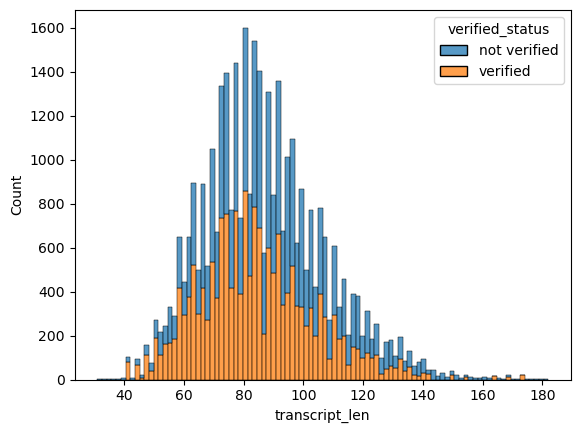

In [174]:
# visualize it
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
#sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", hue="verified_status", element="bars", legend=True)

sns.histplot(data = data_upsampled,
            x = 'transcript_len',
            hue = 'verified_status',
            multiple = 'stack')

**Examine correlation**

In [171]:
data_upsampled.corr()

C:\Users\AIMAN\AppData\Local\Temp\ipykernel_23396\1400946919.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_upsampled.corr()


,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,transcript_len
video_id,1.000000,0.013938,0.001607,0.001483,0.009136,0.006814,0.009402,-0.008550,0.000024,-0.003661,-0.007634
video_duration_sec,0.013938,1.000000,0.013892,0.004527,0.001944,0.006930,0.000896,-0.004085,-0.017286,-0.003802,-0.005043
video_view_count,0.001607,0.013892,1.000000,0.869162,0.710466,0.691557,0.773554,0.270221,0.286045,0.200557,0.246867
video_like_count,0.001483,0.004527,0.869162,1.000000,0.787407,0.765538,0.852325,0.531862,0.433978,0.383587,0.234366
video_share_count,0.009136,0.001944,0.710466,0.787407,1.000000,0.709738,0.662916,0.481414,0.382555,0.590661,0.176362
video_download_count,0.006814,0.006930,0.691557,0.765538,0.709738,1.000000,0.752911,0.471331,0.587743,0.338881,0.175287
video_comment_count,0.009402,0.000896,0.773554,0.852325,0.662916,0.752911,1.000000,0.441490,0.587932,0.321907,0.235080
likes_per_view,-0.008550,-0.004085,0.270221,0.531862,0.481414,0.471331,0.441490,1.000000,0.539853,0.675444,0.087555
comments_per_view,0.000024,-0.017286,0.286045,0.433978,0.382555,0.587743,0.587932,0.539853,1.000000,0.389903,0.111825
shares_per_view,-0.003661,-0.003802,0.200557,0.383587,0.590661,0.338881,0.321907,0.675444,0.389903,1.000000,0.066492


C:\Users\AIMAN\AppData\Local\Temp\ipykernel_23396\3896536040.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  "transcript_len"]].corr(), annot= True)


<Axes: >

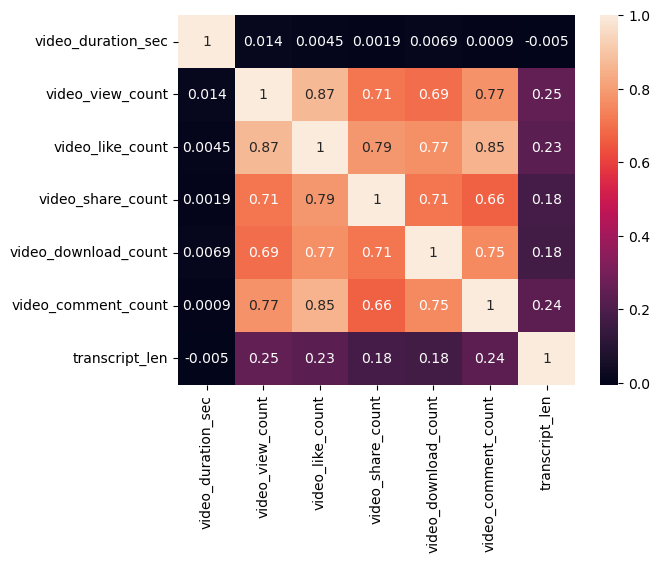

In [266]:
sns.heatmap(data_upsampled[["video_duration_sec", "claim_status", 
                            "author_ban_status", "video_view_count", "video_like_count", 
                            "video_share_count", "video_download_count", "video_comment_count", 
                            "transcript_len"]].corr(), annot= True)

**Construct Model**

In [267]:
y = data_upsampled['verified_status']

X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify =y, random_state = 42)

**Encode**

In [270]:
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [271]:
# Get unique values in `author_ban_status`
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [277]:
#X_train = pd.get_dummies(X_train, columns = ['claim_status','author_ban_status' ])

**Build regression Model**

In [278]:
log_reg = LogisticRegression(random_state= 42).fit(X_train, y_train)

In [281]:
pd.DataFrame(data={"Feature Name":log_reg.feature_names_in_, "Model Coefficient":log_reg.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.009097
1,video_view_count,-0.000002
2,video_share_count,0.000007
3,video_download_count,-0.000041
4,video_comment_count,-0.001205
5,claim_status_claim,-0.000097
6,claim_status_opinion,0.000416
7,author_ban_status_active,0.000339
8,author_ban_status_banned,-0.000017
9,author_ban_status_under review,-0.000003


**NOTE** coef are more than 1 for any feature. need to reevalute the parameters

# Create ML model

In [219]:
df = data.drop(['video_id', 'video_transcription_text'], axis = 1)

In [220]:
df.columns

Index(['claim_status', 'video_duration_sec', 'verified_status',
       'author_ban_status', 'video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count',
       'likes_per_view', 'comments_per_view', 'shares_per_view'],
      dtype='object')

In [221]:
#encode
df['claim_status'] = df['claim_status'].replace({'opinion': 0, 'claim': 1})

df = pd.get_dummies(df,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
df.head()

,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,343296.0,19425.000,241.0,1.0,0.0,0.056584,0.000000,0.000702,0,0,1
1,1,32,140877.0,77355.000,19034.0,1161.0,436.5,0.549096,0.004855,0.135111,0,0,0
2,1,31,902185.0,97690.000,2858.0,833.0,329.0,0.108282,0.000365,0.003168,0,0,0
3,1,25,437506.0,186313.875,34812.0,1234.0,436.5,0.548459,0.001335,0.079569,0,0,0
4,1,19,56167.0,34987.000,4110.0,547.0,152.0,0.622910,0.002706,0.073175,0,0,0


In [222]:
y = df['claim_status']
X = df.drop(['claim_status'], axis =1)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [224]:
X_trn, X_val, y_trn, y_test = train_test_split(X_train, y_train, test_size= 0.25, random_state = 42)

**Build model for Random Forest**

In [202]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

In [225]:
rf = RandomForestClassifier(random_state = 42)

cv_params = {'max_depth':[5, 10, None],
             'max_features': [0.3, 0.6],
             'min_samples_leaf': [1,2],
            'min_samples_split': [2,3],
             'max_samples':[0.7],
             'n_estimators': [75, 100, 200]}

scoring = ['accuracy', 'precision', 'recall', 'f1']

rg_cv = GridSearchCV(rf, cv_params, scoring= scoring, cv= 5, refit='recall')

In [226]:
rg_cv.fit(X_trn, y_trn)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [227]:
rg_cv.best_score_

0.9927562405164976

In [228]:
rg_cv.best_params_

{'max_depth': 10,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 75}

In [229]:
y_pred_rc = rg_cv.best_estimator_.predict(X_test)

In [237]:
#results
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_rc))
print("Precision: ", metrics.precision_score(y_test, y_pred_rc))
print("Recall: ", metrics.recall_score(y_test, y_pred_rc))
print("F1: ", metrics.f1_score(y_test, y_pred_rc))

Accuracy:  0.4846738276133089
Precision:  0.47780678851174935
Recall:  0.4861849096705632
F1:  0.48195944166447197


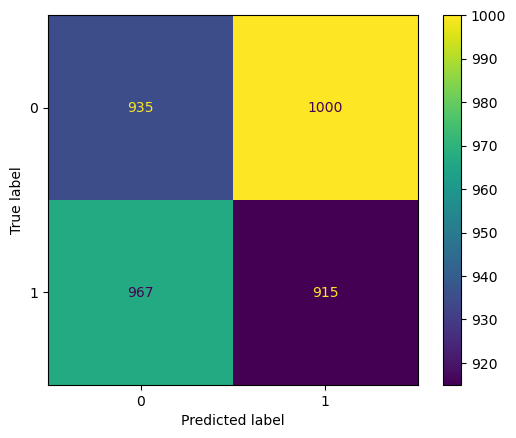

In [240]:
cm = metrics.confusion_matrix(y_test, y_pred_rc)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

**XGBoost Classifier**

In [241]:
xgb = XGBClassifier(objective= 'binary:logistic', random_state = 42)

xg_para = {'max_depth': [4,8, 10],
          'learning_rate': [0.2, 0.5],
           'min_child_weight': [3, 5],
           'n_estimators': [300, 500]
          }
scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv= GridSearchCV(xgb, xg_para, scoring= scoring, cv=5, refit='recall')

In [242]:
xgb_cv.fit(X_trn, y_trn)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.2, 0.5], 'max_depth': [4, 8, 10],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [243]:
xgb_cv.best_score_

0.9922388503763647

In [244]:
xgb_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [245]:
xgb_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 10,
 'min_child_weight': 3,
 'n_estimators': 300}

In [248]:
y_pred_xgb = xgb_cv.best_estimator_.predict(X_test)

**Results**

In [249]:
#results
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision: ", metrics.precision_score(y_test, y_pred_xgb))
print("Recall: ", metrics.recall_score(y_test, y_pred_xgb))
print("F1: ", metrics.f1_score(y_test, y_pred_xgb))

Accuracy:  0.4846738276133089
Precision:  0.4777835859905907
Recall:  0.485653560042508
F1:  0.4816864295125165


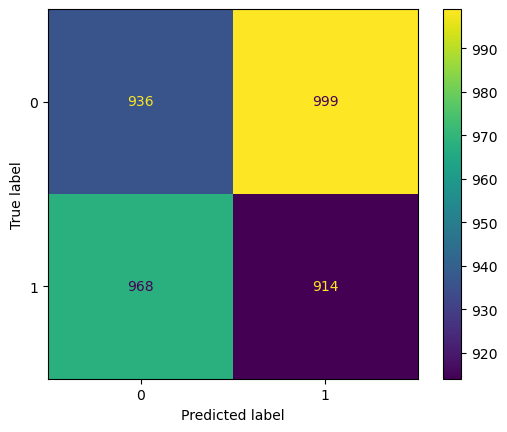

In [251]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

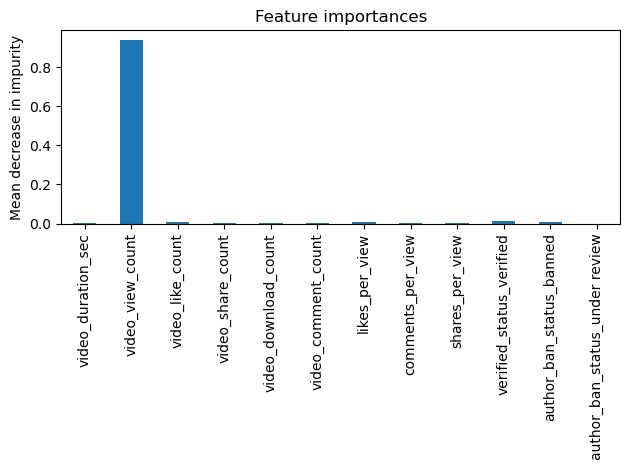

In [258]:
importances = xgb_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

**NOTE** video_duration_count is having much greater dependence as compared to other feature. need to redesign the model by the evaluated the input data.